Learn to predict the number of real solutions of the tritangent circles to three conics.

In [68]:
#TODO inspect predictions
#TODO check distribution of real counts in training data
#TODO ???

#TODO man bekommt nicht immer zwei weitere Lösungen!!
#TODO R18 -> R2 svd plot ral count

In [69]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras import regularizers
import pandas as pd
import numpy as np

In [70]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)

batch_1 = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')
# batch_2 = df[[col for col in df.columns if col[0].islower()]].rename(str.lower, axis='columns')
# batch_2.insert(0, "counts", np.array(batch_1['counts']) - 2)
# batch_2[batch_2['counts'] < 0] = 0
data = batch_1 # .append(batch_2).reset_index().drop('index', axis=1)

In [71]:
data.sample()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,counts
97060,0.193349,0.411968,0.204857,0.677111,0.858868,0.313272,0.161439,0.709652,0.899719,0.368352,0.090209,0.180536,0.063682,0.58056,0.122245,0.656709,0.118586,0.282461,40


In [80]:
# Create Training and Validation Data
count = np.array(data['counts'].values.tolist(), dtype=np.int)
param = np.array(data.drop('counts', axis=1).values.tolist(), dtype=np.float64)
n = int(0.8*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [81]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=1000, activation='relu', input_shape=(18,)),
    keras.layers.Dense(units=1000, activation='relu'),
    keras.layers.Dense(units=136, activation='softmax')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1000)              19000     
_________________________________________________________________
dense_54 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_55 (Dense)             (None, 136)               136136    
Total params: 1,156,136
Trainable params: 1,156,136
Non-trainable params: 0
_________________________________________________________________


In [82]:
sce = keras.losses.SparseCategoricalCrossentropy()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer='Adam', 
              loss=sce,
              metrics=['accuracy', sce],
              callbacks=[callback])

In [83]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=250,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

Train on 80000 samples, validate on 20000 samples
Epoch 1/250
80000/80000 - 55s - loss: 2.5354 - accuracy: 0.1647 - sparse_categorical_crossentropy: 2.5354 - val_loss: 2.4165 - val_accuracy: 0.1908 - val_sparse_categorical_crossentropy: 2.4166
Epoch 2/250
80000/80000 - 61s - loss: 2.3630 - accuracy: 0.2102 - sparse_categorical_crossentropy: 2.3630 - val_loss: 2.2619 - val_accuracy: 0.2424 - val_sparse_categorical_crossentropy: 2.2618
Epoch 3/250
80000/80000 - 59s - loss: 2.1577 - accuracy: 0.2807 - sparse_categorical_crossentropy: 2.1577 - val_loss: 1.9610 - val_accuracy: 0.3539 - val_sparse_categorical_crossentropy: 1.9608
Epoch 4/250
80000/80000 - 58s - loss: 1.8412 - accuracy: 0.3963 - sparse_categorical_crossentropy: 1.8412 - val_loss: 1.5693 - val_accuracy: 0.4985 - val_sparse_categorical_crossentropy: 1.5691
Epoch 5/250
80000/80000 - 54s - loss: 1.4596 - accuracy: 0.5372 - sparse_categorical_crossentropy: 1.4596 - val_loss: 1.1624 - val_accuracy: 0.6564 - val_sparse_categorical_c

[]

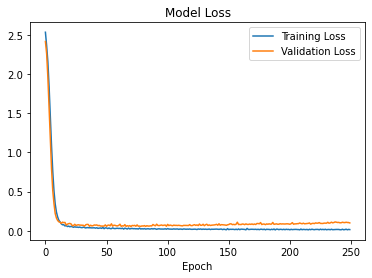

In [84]:
# Graphs
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

[]

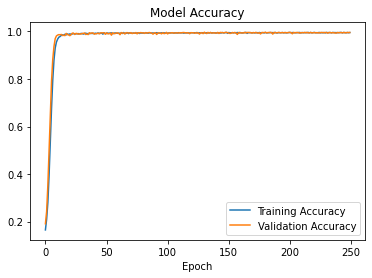

In [85]:
# Graphs
fig = plt.figure()
plt.title('Model Accuracy')
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.plot()

In [86]:
model.save("model_1000_1000_136.h5")
print("Saved model to disk")

Saved model to disk


ValueError: operands could not be broadcast together with shapes (20000,136) (20000,) 

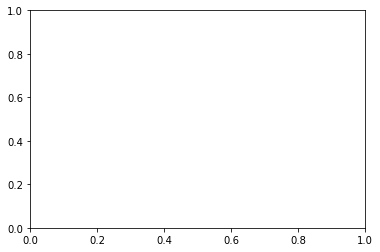

In [87]:
predictions = model.predict(param_val)
actual = count_val

fig = plt.figure()
plt.title('')
plt.plot(predictions - actual) 
plt.legend(['predictions - actual values'])
plt.plot()